In [1]:
import numpy as np
import numpy.ma
from astropy.io import fits
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt
from scipy import ndimage
import scipy.interpolate as interp
import os.path

In [2]:
#imports if needed
from astropy.io import fits
import astropy.units as u
import astropy.wcs as fitswcs
from specutils import Spectrum1D
import matplotlib.pyplot as plt

def plot_spectra(filenames,xmin=3500,xmax=9000,ymin=-500,ymax=5000):
    #list of path files
    spec_list = filenames 

    #list of spectrum1D
    spec1D_list = []

    #modify offset for change visualization preferences
    offset = 0.3

    #parse and create plot for each spectrum in progress
    for sip in spec_list :
        sip_file = fits.open(sip)
        sip_data = sip_file[0].data
        sip_header = sip_file[0].header

        #create WCS object for each spectrum in progress
        sip_wcs = fitswcs.WCS(header={'CDELT1': sip_header['CDELT1'], 'CRVAL1': sip_header['CRVAL1'],
                                       'CTYPE1': 'WAVE',
                                       'CRPIX1': sip_header['CRPIX1']})

        #apply offset on flux and create spec1D
        sip_flux = (sip_data + (offset * (spec_list.index(sip)))) * u.Jy
        sip_spec1D = Spectrum1D(flux=sip_flux, wcs=sip_wcs)

        #add spec1D to spec1DList
        spec1D_list.append((sip_spec1D, sip_header))

    
    #create a line plot for each spec1D in the list
    for spec1Dip in spec1D_list:
        plt.plot(spec1Dip[0].spectral_axis, spec1Dip[0].flux, label=spec1Dip[1]['FILENAME'],alpha=0.7)
    print(spec1Dip[1]['OBJECT'].split(' first')[0])
    title=str(spec1Dip[1]['OBJECT'].split(' first')[0])
    plt.title(title, fontsize=16, fontweight='bold')
    return 

In [3]:
date=str(20231220)
path = '' #Use a path that makes importing the target files easy

Gaia DR3 3044350064397751808
Gaia DR3 3044350064397751808


<>:16: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\l'
/var/folders/j1/8cybr_w118g62wr61rgcz31m0000gn/T/ipykernel_62432/637241259.py:16: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Wavelength ($\lambda$) in $\AA$ ')


(-0.1, 1.2)

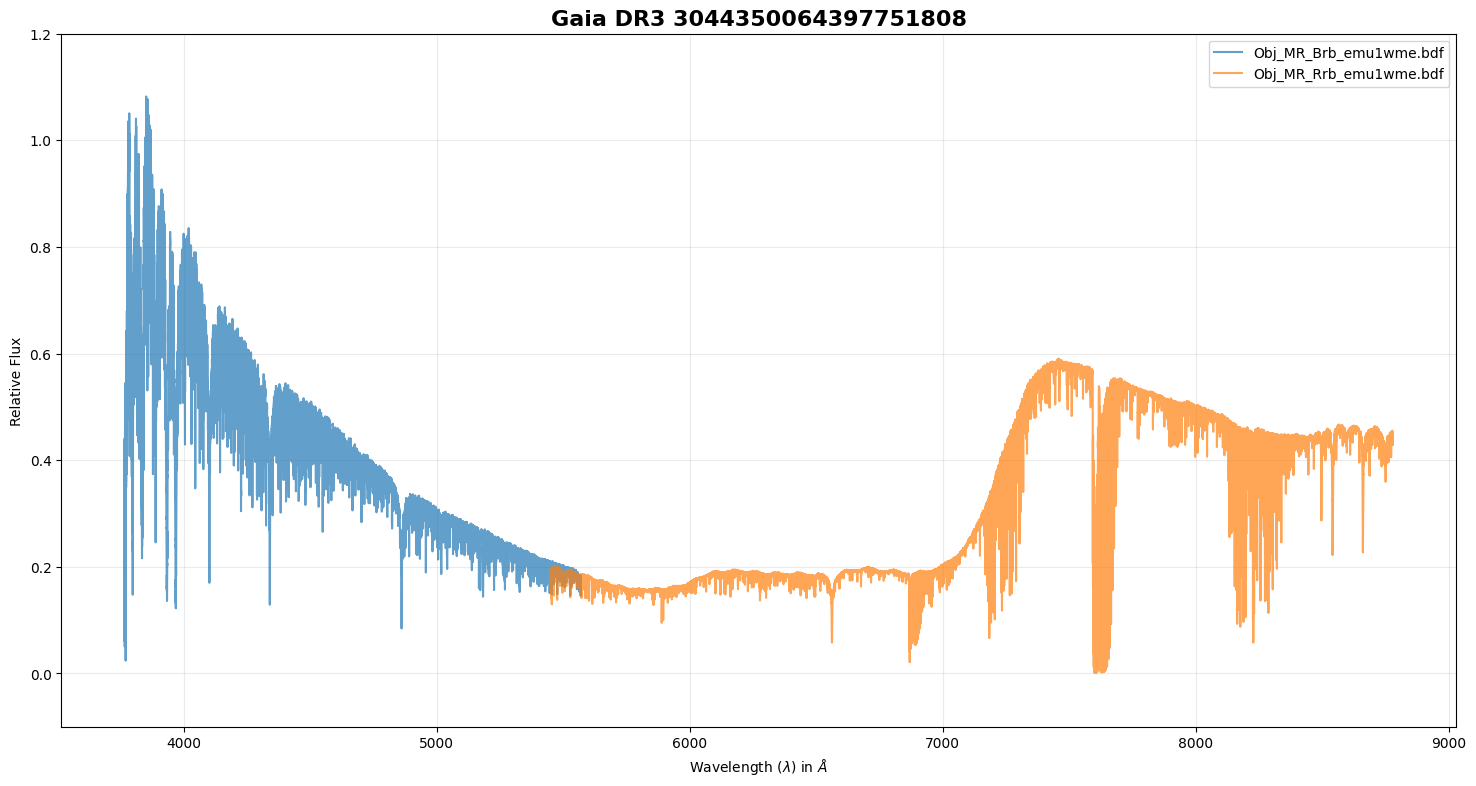

In [7]:
fileno='0014'
input=date+fileno
file1=path+'mbgphH'+input+'_u1wm.fits'
file2=path+'mbgphR'+input+'_u1wm.fits'
file3=path+'mbgphH'+input+'_u2wm.fits'
file4=path+'mbgphR'+input+'_u2wm.fits'

fig = plt.subplots(figsize=(18, 9))
plot_spectra([file1])
plot_spectra([file2])

#Plot configuration 
plt.legend(loc='upper right')
plt.xlabel('Wavelength ($\lambda$) in $\AA$ ')
plt.ylabel("Relative Flux")
plt.grid(alpha=0.25)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(-0.1,1.2)